# Inferencia Bayesiana Entrega 1: Maitas Moran LU 806/19

## Guia 1 - Ejercicio 9
El jugador Montiel convirtio los 12 penales que pateo al dia de la fecha en su carrera profesional

a) Usando un prior beta de la probabilidad que tiene Montiel de convertir un penal, es decir $\theta \sim \Beta(alpha, beta)$ encontrar la distribución posterior para $\theta$ y graficarla (definir a gusto los parámetros alpha y beta de la distribución).

b) ¿Cuál es la probabilidad de que convierta el penal número 13? ¿Cómo se compara con la
estimación frecuentista?

c) ¿Qué supuestos estamos haciendo sobre el proceso que generó los datos?

d) Haciendo simulaciones, crear un histograma de la distribución predicha de penales convertidos
en los próximos 10 penales que ejecute Montiel (posterior predictive distribution).

e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

### Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import beta
from scipy.optimize import curve_fit
from scipy import integrate
from scipy import special as scipy_special

### a) Usando un prior beta de la probabilidad que tiene Montiel de convertir un penal, es decir $\theta \sim \Beta(alpha, beta)$ encontrar la distribución posterior para $\theta$ y graficarla (definir a gusto los parámetros alpha y beta de la distribución).


- Para el Prior usamos $\Beta(13, 4)$ porque nos parece una distribucion que modela bien la probabilidad de que un jugador convierta un penal en base a la intuicion de saber que es mas probable que un penal termine en gol contrario a que no lo haga

Para este prior queremos encontrar la distribucion posterior para $\theta$

Primero calculamos la Likehood de ver los datos de montiel asumiendo que cada penal se comporta como un experimento de bernoulli con probabilidad $\theta$, es decir que cada penal tiene la misma probabilidad de terminar en gol y que es independiente del penal anterior (esto es un modelo simplista ya que implica que no depende del arquero, del contexto del partido, de lesiones de jugadores, etc)

- $Y \sim Bin(n, \theta)$
- $\theta \sim  \Beta(\alpha_{0}, \beta_{0})$

- $L(\theta | datosMontiel) = P( Y = k | \theta) = \binom{n}{k}\theta^{k}(1-\theta)^{n-k}=\theta^{12}$
- $Prior(\theta) = \theta^{\alpha_{0} - 1} \cdot (1 - \theta)^{\beta_{0} - 1} = \theta^{12} \cdot (1 - \theta)^{3}$ 



Podemos calcular la *Post* para cada *Prior* como:

- $Post(\theta | datosMontiel) \propto  L(\theta | datosMontiel) \cdot P(\theta)$

- $Post(\theta | datosMontiel) \propto \theta^{12} \cdot \theta^{\alpha_{0} - 1} \cdot (1 - \theta)^{\beta_{0} - 1}$

- $Post(\theta | datosMontiel) \propto \theta^{\alpha_{0} + 11} \cdot (1 - \theta)^{\beta_{0} - 1}$

- $Post(\theta | datosMontiel) \sim Beta(\alpha_{0} + 12, \beta_{0}) $



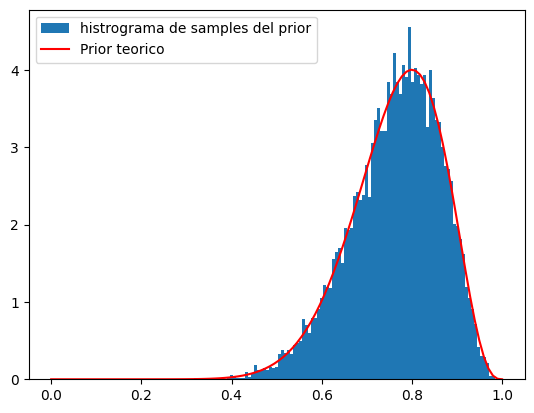

In [3]:
np.random.seed(42)
prior_alpha = 13
prior_beta = 4

prior_samples = np.random.beta(prior_alpha, prior_beta, 10000) # generamos numericamente 10000 samples de la distribucion beta de prior
x = np.linspace(0, 1, 100)
y = beta.pdf(x, prior_alpha, prior_beta)
bins_n=100

plt.plot()
plt.hist(prior_samples, bins=bins_n, density=True, label='histrograma de samples del prior')
plt.plot(x, y, 'r-', label='Prior teorico')
plt.xlim(-0.05, 1.05)
plt.legend()
plt.show()

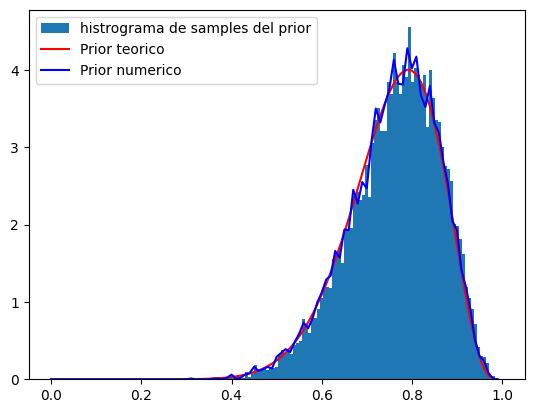

In [4]:
# Ahora vamos a obtener numericamente la funcion del prior a partir del histograma de los samples y la vamos a escalar para que sea una PDF
y_prior, x_bins = np.histogram(prior_samples, bins=bins_n, range=(0, 1))
y_prior = y_prior / np.sum(y_prior * (x_bins[1] - x_bins[0])) # escalamos para que sea PDF dividiendo por la "integral"
x = x_bins[:-1]


plt.plot()
plt.hist(prior_samples, bins=bins_n, density=True, label='histrograma de samples del prior')
plt.plot(x, y, 'r-', label='Prior teorico')
plt.plot(x, y_prior, 'b-', label='Prior numerico')
plt.xlim(-0.05, 1.05)
plt.legend()
plt.show()

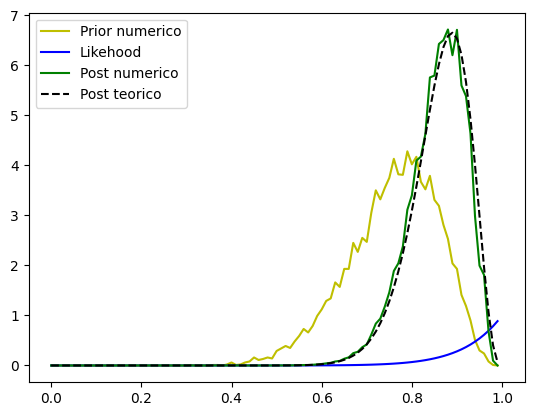

In [5]:
# ahora ya contamos con una discretizacion de la PDF del prior vamos a calcular la Likehood de la binomial y su posterior normalizada

y_likehood = x**12

y_post = y_likehood * y_prior
y_post = y_post / np.sum(y_post * (x[1] - x[0]))

plt.plot()
plt.plot(x, y_prior, 'y-', label='Prior numerico')
plt.plot(x, y_likehood, 'b-', label='Likehood')
plt.plot(x, y_post, 'g', label='Post numerico')
plt.plot(x, beta.pdf(x, prior_alpha + 12, prior_beta), 'black', linestyle='--', label='Post teorico')
plt.xlim(-0.05, 1.05)
plt.legend()
plt.show()

### b) ¿Cuál es la probabilidad de que convierta el penal número 13? ¿Cómo se compara con la estimación frecuentista?

In [6]:
from scipy.stats import rv_discrete

# Funcion para generar samples a partir de una distribucion
def sample_from_pdf(n, x_values, y_values):
    pdf = rv_discrete(name='my_pdf', values=(x_values, y_values))
    return pdf.rvs(size=n)

Promedio 0.8558791
Esperanza Teorica 0.8620689655172413


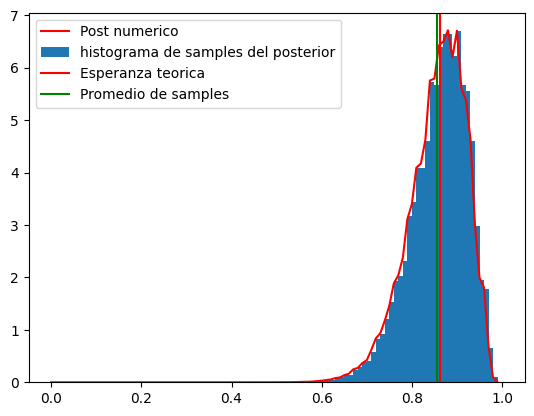

In [7]:
samples = sample_from_pdf(100000, x, y_post/np.sum(y_post)) # normalizamos y_post para que sume 1

mean = np.mean(samples)
teorical_mean = (prior_alpha + 12) / (prior_alpha + 12 + prior_beta)

print("Promedio", mean)
print("Esperanza Teorica", teorical_mean)     # E = alpha / alpha + beta 

fig, ax = plt.subplots(1)
plt.plot(x, y_post, 'r', label='Post numerico')
plt.hist(samples, bins=x, density=True, label='histograma de samples del posterior')
ax.axvline(teorical_mean, color ="red", label = "Esperanza teorica")
ax.axvline(mean, color = "green", linestyle = "-", label = "Promedio de samples")
plt.xlim(-0.05, 1.05)
plt.legend()
plt.show()

La probabilidad de que convierta el siguiente penal es de 85.61% que fue lo calculado con las simulaciones, en cambio, si lo hicieramos desde un aproach frecuentista en base a los datos el porcentaje seria 12/12 = 100% de probabilidad de convertir el gol.

### c)  ¿Qué supuestos estamos haciendo sobre el proceso que generó los datos?

- Estamos asumiendo que la probabilidad de convertir penales son independientes entre si al modelarlo como un experimento de Bernoulli
- Estamos asumiendo que la probabilidad de convertir penales es siempre la misma para un jugador y que muchos factores como la habilidad del arquero, el estado fisico del jugador, el contexto del partido no influyen en el resultado

### d)  Haciendo simulaciones, crear un histograma de la distribución predicha de penales convertidos en los próximos 10 penales que ejecute Montiel (posterior predictive distribution).

Promedio: 8.55561


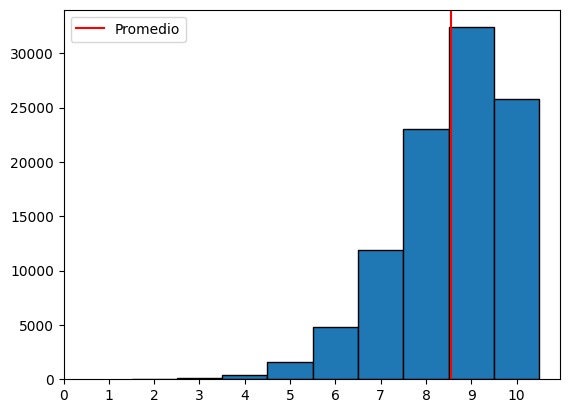

In [14]:
samples = sample_from_pdf(100000, x, y_post/np.sum(y_post)) # normalizamos y_post para que sume 1

# Generamos aleatoriamente cuantos goles metió de los 10 tiros para cada sample de theta.
goals_predicted = np.vectorize(lambda x: np.random.binomial(10, x))(samples)

mean= np.mean(goals_predicted)
print("Promedio:", mean)

fig, ax = plt.subplots(1)
d = np.diff(np.unique(goals_predicted)).min()
left_of_first_bin = goals_predicted.min() - float(d)/2
right_of_last_bin = goals_predicted.max() + float(d)/2
plt.hist(goals_predicted, np.arange(left_of_first_bin, right_of_last_bin + d, d), edgecolor='black')
ax.set_xticks([i for i in range(11)])
ax.axvline(mean, color = "red", label = "Promedio")
ax.legend()
plt.show()

### e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

In [18]:
# contamos la cantidad de samples que tienen al menos 8 goles y dividimos por la cantidad total
len(np.where(goals_predicted >= 8)[0])/len(goals_predicted)

0.81185

# a

In [ ]:
#Scrapeamos manualmente la base de trasnfermarkt para obtener la info
df_europe = pd.read_csv('players_penalties.csv')

print('Number of players in the dataset:', len(df_europe))
df_europe

Number of players in the dataset: 1559


,Name,Goals,Misses
0,ScottTwine,1,1
1,JuniorAjayi,0,0
2,BeñatTurrientes,0,0
3,AndrewMoran,0,1
4,ChrisRamos,0,0
...,...,...,...
1554,Juanmi,0,0
1555,IñigoRuiz de Galarreta,0,0
1556,CédricBakambu,17,1
1557,AbdoulayeDoucouré,1,0


In [ ]:
# Para la simplicidad del analisis vamos a filtrar todos los jugadores con menos de 10 penales pateados.
# aunque estaria bueno ver que tanto empeora en el resultado final

df_europe = df_europe[(df_europe["Goals"] + df_europe["Misses"]) > 10]
df_europe['GoalRatio'] = df_europe['Goals'] / (df_europe['Goals'] + df_europe['Misses'])
df_europe

/tmp/ipykernel_760087/3358776130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe['GoalRatio'] = df_europe['Goals'] / (df_europe['Goals'] + df_europe['Misses'])


,Name,Goals,Misses,GoalRatio
5,ÁlvaroMorata,14,4,0.777778
16,Jordan,10,3,0.769231
17,NikolaVlašić,9,5,0.642857
18,JamesMilner,30,5,0.857143
20,RomanYaremchuk,6,5,0.545455
...,...,...,...,...
1546,NealMaupay,12,3,0.800000
1550,LukeBerry,9,4,0.692308
1551,AntoineGriezmann,24,13,0.648649
1552,HakanÇalhanoğlu,41,4,0.911111


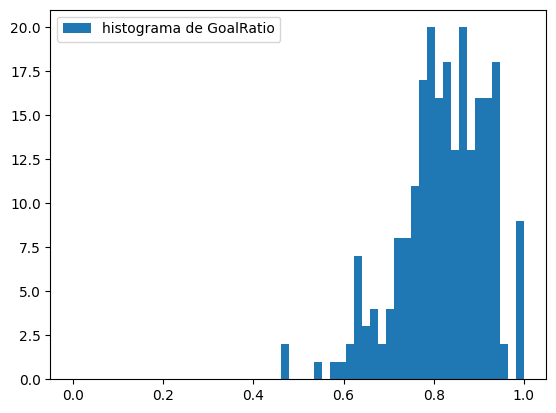

In [ ]:
plt.plot()
plt.hist(df_europe['GoalRatio'], label='histograma de GoalRatio', bins=30)
plt.legend()
plt.xlim(-0.05, 1.05)
plt.show()

Best-fit parameters: a = 4.45, b = 1.36


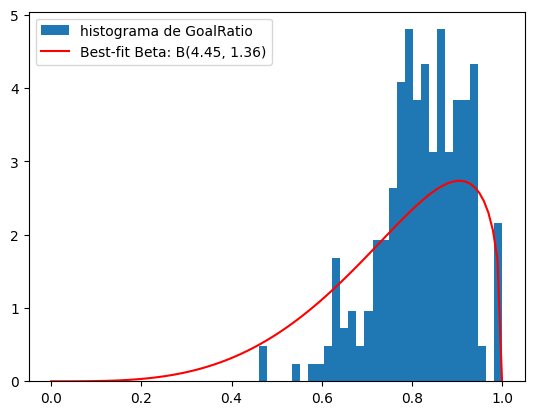

In [ ]:

def beta_pdf(x, a, b):
    return beta.pdf(x, a, b)

def fit_beta_distribution(x, y):
    popt, pcov = curve_fit(beta_pdf, x, y)
    return popt[0], popt[1]


hist, bin_edges = np.histogram(df_europe['GoalRatio'], bins=np.unique(df_europe['GoalRatio']))
alpha_0, beta_0 = fit_beta_distribution(bin_edges[:-1], hist)

x = np.linspace(0, 1, 100)
y = beta_pdf(x, alpha_0, beta_0)
plt.hist(df_europe['GoalRatio'], label='histograma de GoalRatio', bins=30, density=True)
plt.plot(x, y, 'r-', label='Best-fit Beta: B({:.2f}, {:.2f})'.format(alpha_0, beta_0))
plt.legend()
plt.xlim(-0.05, 1.05)
plt.show()

In [ ]:
# Prior Campeones del mundo
df_arg = pd.DataFrame({"Player":[], "Goals":[], "Misses":[], "GoalRatio":[]})

df_arg = df_arg.append({"Player":"FrancoArmani", "Goals":0, "Misses":0, "GoalRatio":0}, ignore_index=True)

naive_prior_alpha = 13
naive_prior_beta = 4

naive_post_alpha = naive_prior_alpha + montiel_penalty_goals
naive_post_alpha = naive_prior_beta + montiel_penalty_misses

AttributeError: 'DataFrame' object has no attribute 'append'

Vamos a buscar la probabilidad de que Montiel convierta el penal numero 13.

Promedio 0.9260518111532569
Esperanza 0.9285714285714286


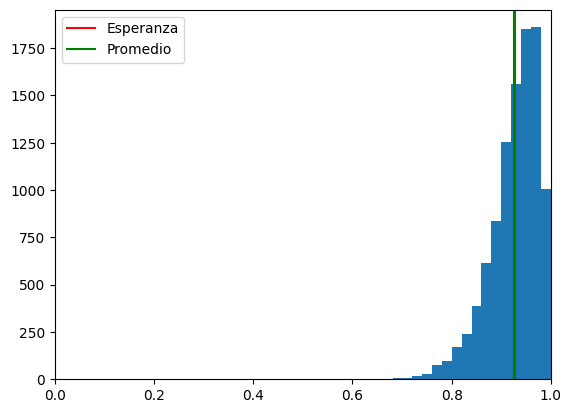

In [ ]:
# Generamos unos titas randoms.
# A partir de esos titas simulamos la cantidad de goles hechos.
# Estos goles los guardamos en "tiros".
samples = np.array([])
for i in range(1,10000):
    tita = np.random.beta(25, 2)
    samples = np.append(samples, tita)


# Calculamos la mediana y el promedio de "tiros" 
mean= np.mean(samples)
print("Promedio", mean)
print("Esperanza", 13 / (13+1))     # E = alpha / alpha + beta 
fig, ax = plt.subplots(1)
ax.hist(samples, bins = 20)
ax.set_xlim(0,1)
ax.axvline(13 / (13+1), color ="red", label = "Esperanza")
ax.axvline(mean, color = "green", linestyle = "-", label = "Promedio")
ax.legend()
plt.show()

- Segun los Bayesianos, tenemos un 92.6% de probabilidades de ver a Montiel meter el 13vo tiro.

- Mientras que los frecuentistas dirian que es el 100%.

### e) Estimar la probabilidad de que Montiel meta al menos 8 de los próximos 10 penales que patee.

Teniendo el Histograma anterior, podriamos simplemente sumar los casos en que Montiel haya metido 8, 9 y 10 penales y dividirlos por la cantidad total de intentos. 

In [ ]:
# Filtramos los casos en que Montiel haya metido >= 8 goles
tiros_predichos_filtrados = [tiro for tiro in goals_predicted if tiro >= 8]

# Calculamos el promedio frecuentista de que meta >= 8 goles.
len(tiros_predichos_filtrados) / len(goals_predicted)

0.9395939593959396